In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
data_path="/content/drive/My Drive/marrige/Comcast_telecom_complaints_data.csv"
data=pd.read_csv(data_path)

In [ ]:
data.isnull().sum()#no null value identified

Ticket #                       0
Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64

In [ ]:
data.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


**adding another column Issue it  will help us to find toatal such cases**

In [ ]:
total_issue=pd.DataFrame(np.ones(data.shape[0]))

In [ ]:
data.insert(loc=0,value=total_issue,column="Issue")

**Converting the data_month_year to Date Month and Year**

In [ ]:
date=[]
month=[]
year=[]
for sample in data.Date_month_year:
  val=str(sample).split("-")
  date.append(int(val[0]))
  month.append(val[1])
  year.append(val[2])

  


In [ ]:
data.drop(["Ticket #"],axis=1,inplace=True)
data

,Issue,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,1.0,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,1.0,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,1.0,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,1.0,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,1.0,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No
...,...,...,...,...,...,...,...,...,...,...,...
2219,1.0,Service Availability,04-02-15,04-Feb-15,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No
2220,1.0,Comcast Monthly Billing for Returned Modem,06-02-15,06-Feb-15,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No
2221,1.0,complaint about comcast,06-09-15,06-Sep-15,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No
2222,1.0,Extremely unsatisfied Comcast customer,23-06-15,23-Jun-15,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No


In [ ]:
data.insert(loc=3,value=date,column="Dates")
data.insert(loc=4,value=month,column="Month")
data.insert(loc=5,value=year,column="Year")


In [ ]:
data.drop(["Date"],axis=1,inplace=True)

In [ ]:
data.drop(["Date_month_year"],axis=1,inplace=True)

In [ ]:
data

,Issue,Customer Complaint,Dates,Month,Year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,1.0,Comcast Cable Internet Speeds,22,Apr,15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,1.0,Payment disappear - service got disconnected,4,Aug,15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,1.0,Speed and Service,18,Apr,15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,1.0,Comcast Imposed a New Usage Cap of 300GB that ...,5,Jul,15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,1.0,Comcast not working and no service to boot,26,May,15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No
...,...,...,...,...,...,...,...,...,...,...,...,...
2219,1.0,Service Availability,4,Feb,15,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No
2220,1.0,Comcast Monthly Billing for Returned Modem,6,Feb,15,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No
2221,1.0,complaint about comcast,6,Sep,15,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No
2222,1.0,Extremely unsatisfied Comcast customer,23,Jun,15,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No


Grouping the complaint w.r.t month

In [ ]:
data_group_by_month=data.groupby(data.Month).sum()

In [ ]:
data_group_by_month

,Issue,Dates,Zip code
Month,,,
Apr,375.0,7596,17358548
Aug,67.0,331,3089026
Dec,65.0,353,3344612
Feb,59.0,293,3022550
Jan,55.0,282,2483519
Jul,49.0,229,2074708
Jun,1046.0,23335,52759687
Mar,45.0,235,2284081
May,317.0,6253,13751629


In [ ]:
issue_count=data_group_by_month.Issue
issuue_month=data_group_by_month.index

**ploting the issue month wise**

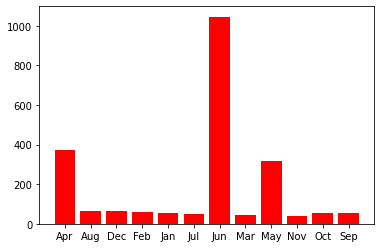

In [ ]:

plt.bar(issuue_month,issue_count,color="red")
plt.show()


As per the plot we can clearly see that maximum number of issue raised in June Month

Grouping with respect to the dates

In [ ]:
data_group_by_dates=data.groupby(data.Dates).sum()

In [ ]:
data_group_by_dates.head()

,Issue,Zip code
Dates,,
4,206.0,9895965
5,131.0,6668308
6,272.0,12645019
13,68.0,3247662
14,54.0,2323170


In [ ]:
case_count=data_group_by_dates.Issue
dates=data_group_by_dates.index

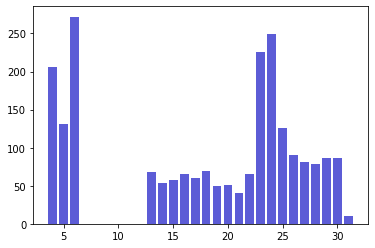

In [ ]:
plt.bar(dates,case_count,color="#5c5cd6")
plt.show()

AS per the plot we can clearly see that maximum number of cases open on 6th day of the month, while between 7 and 12 there are no cases at all


**Grouping by the Complaint type to identify the which kind of the complaints are often**

In [ ]:
group_by_complaint_type=(data.groupby(["Customer Complaint"]).sum())

In [ ]:
group_by_complaint_type

,Issue,Dates,Zip code
Customer Complaint,,,
(Comcast is not my complaint!) Cyber Tele-marketing is my complaint!,1.0,27,26062
10 Days No Service - 12 Appointments Comcast Hasn't Shown Up - Comcast Has Not Fixed Home Infinity X1 - In 10 Days- Cannot Make 911 Calls,1.0,27,29406
2 months and Comcast has not fixed problem,1.0,21,37013
2+ Day Degraded Services,1.0,22,22815
300 GB monthly allowance,1.0,25,30122
...,...,...,...
why am I paying for this ?,1.0,23,22172
without service despite willingness to pay,1.0,26,22204
xfinitty tv and exfinity alarm,1.0,13,33314


In [ ]:
group_by_mode_communication=data.groupby(["Received Via"]).sum()

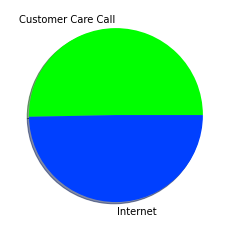

In [ ]:
group=group_by_mode_communication.index
Issue=group_by_mode_communication.Issue
color=["#00ff00", "#0040ff"]

plt.pie(Issue,colors=color,labels=group,shadow=True)
plt.show()

**Creating open and close column**

In [ ]:
oppen=[]
close=[]
open_close_categorical=[]
i=0
for sample in data.Status:
  if(sample=="Open" or sample=="Pending"):
    oppen.append(1)
    close.append(0)
    open_close_categorical.append("open")
    i=i+1
  else:
    oppen.append(0)
    close.append(1)
    open_close_categorical.append("Close")
    i=i+1

In [ ]:
open_close_categorical.count("Close")

1707

In [ ]:
oppen=pd.DataFrame(oppen)
close=pd.DataFrame(close)
data.insert(loc=10,value=open_close_categorical,column="New_Status")
data.insert(loc=11,value=oppen,column="Open")
data.insert(loc=12,value=close,column="Close")

**Succesfully created the new column "New_Status that has only 2 status Open and Close as per the Instruction"**


In [ ]:
data.head(10)

,Issue,Customer Complaint,Dates,Month,Year,Time,Received Via,City,State,Zip code,New_Status,Open,Close,Status,Filing on Behalf of Someone
0,1.0,Comcast Cable Internet Speeds,22,Apr,15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Close,0,1,Closed,No
1,1.0,Payment disappear - service got disconnected,4,Aug,15,10:22:56 AM,Internet,Acworth,Georgia,30102,Close,0,1,Closed,No
2,1.0,Speed and Service,18,Apr,15,9:55:47 AM,Internet,Acworth,Georgia,30101,Close,0,1,Closed,Yes
3,1.0,Comcast Imposed a New Usage Cap of 300GB that ...,5,Jul,15,11:59:35 AM,Internet,Acworth,Georgia,30101,open,1,0,Open,Yes
4,1.0,Comcast not working and no service to boot,26,May,15,1:25:26 PM,Internet,Acworth,Georgia,30101,Close,0,1,Solved,No
5,1.0,ISP Charging for arbitrary data limits with ov...,6,Dec,15,9:59:40 PM,Internet,Acworth,Georgia,30101,Close,0,1,Solved,No
6,1.0,Throttling service and unreasonable data caps,24,Jun,15,10:13:55 AM,Customer Care Call,Acworth,Georgia,30101,open,1,0,Pending,No
7,1.0,Comcast refuses to help troubleshoot and corre...,23,Jun,15,6:56:14 PM,Internet,Adrian,Michigan,49221,Close,0,1,Solved,No
8,1.0,Comcast extended outages,6,Jan,15,11:46:30 PM,Customer Care Call,Alameda,California,94502,Close,0,1,Closed,No
9,1.0,Comcast Raising Prices and Not Being Available...,28,Jun,15,6:46:31 PM,Customer Care Call,Alameda,California,94501,open,1,0,Open,Yes


In [ ]:
##droping the old Status
data.drop(["Status"],axis=1,inplace=True)

In [ ]:
data

,Issue,Customer Complaint,Dates,Month,Year,Time,Received Via,City,State,Zip code,New_Status,Open,Close,Filing on Behalf of Someone
0,1.0,Comcast Cable Internet Speeds,22,Apr,15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Close,0,1,No
1,1.0,Payment disappear - service got disconnected,4,Aug,15,10:22:56 AM,Internet,Acworth,Georgia,30102,Close,0,1,No
2,1.0,Speed and Service,18,Apr,15,9:55:47 AM,Internet,Acworth,Georgia,30101,Close,0,1,Yes
3,1.0,Comcast Imposed a New Usage Cap of 300GB that ...,5,Jul,15,11:59:35 AM,Internet,Acworth,Georgia,30101,open,1,0,Yes
4,1.0,Comcast not working and no service to boot,26,May,15,1:25:26 PM,Internet,Acworth,Georgia,30101,Close,0,1,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219,1.0,Service Availability,4,Feb,15,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Close,0,1,No
2220,1.0,Comcast Monthly Billing for Returned Modem,6,Feb,15,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Close,0,1,No
2221,1.0,complaint about comcast,6,Sep,15,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Close,0,1,No
2222,1.0,Extremely unsatisfied Comcast customer,23,Jun,15,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Close,0,1,No


In [ ]:
state_wise_analysis=data.groupby(["State"]).sum()
state_wise_analysis.head()

,Issue,Dates,Zip code,Open,Close
State,,,,,
Alabama,26.0,436,898260,9,17
Arizona,20.0,419,1714671,6,14
Arkansas,6.0,88,433044,0,6
California,220.0,3848,20844238,61,159
Colorado,80.0,1506,6430155,22,58


**State Wise Complaint Status**

In [ ]:
state=state_wise_analysis.index
opn=state_wise_analysis.Open
close=state_wise_analysis.Close

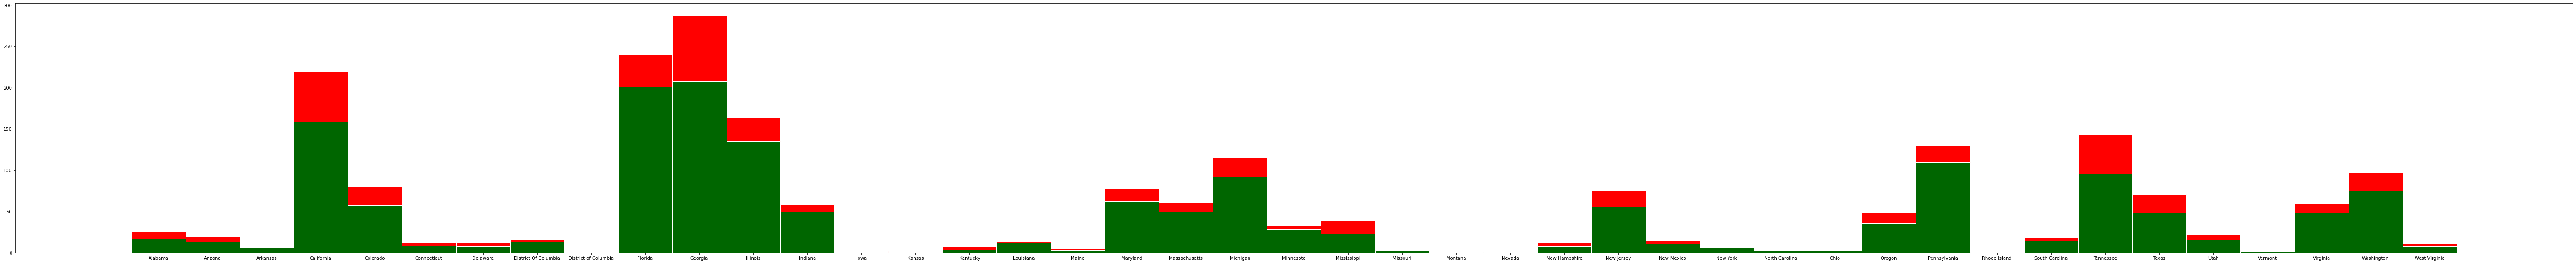

In [ ]:
total_number_state=len(state)
r=np.arange(total_number_state)
fig = plt.gcf()
barWidth=1
fig.set_size_inches(100, 10)
plt.bar(r, close, color="#006600", edgecolor='white', width=barWidth)
plt.bar(r, opn, bottom=close, color='red', edgecolor='white', width=barWidth)
plt.xticks(r, (state))
plt.show()


# **PLEASE NOTE:** I have taken a very large figure size as we have a large number of state in the data set, Please open the image in new tab for beeter visualization

In [ ]:
state_wise_analysis.Issue.sort_values(ascending=False)

State
Georgia                 288.0
Florida                 240.0
California              220.0
Illinois                164.0
Tennessee               143.0
Pennsylvania            130.0
Michigan                115.0
Washington               98.0
Colorado                 80.0
Maryland                 78.0
New Jersey               75.0
Texas                    71.0
Massachusetts            61.0
Virginia                 60.0
Indiana                  59.0
Oregon                   49.0
Mississippi              39.0
Minnesota                33.0
Alabama                  26.0
Utah                     22.0
Arizona                  20.0
South Carolina           18.0
District Of Columbia     16.0
New Mexico               15.0
Louisiana                13.0
New Hampshire            12.0
Connecticut              12.0
Delaware                 12.0
West Virginia            11.0
Kentucky                  7.0
New York                  6.0
Arkansas                  6.0
Maine                     5.0
Miss

In [ ]:
state_wise_analysis.Open.sort_values(ascending=False)

State
Georgia                 80
California              61
Tennessee               47
Florida                 39
Illinois                29
Michigan                23
Washington              23
Texas                   22
Colorado                22
Pennsylvania            20
New Jersey              19
Mississippi             16
Maryland                15
Oregon                  13
Massachusetts           11
Virginia                11
Indiana                  9
Alabama                  9
Utah                     6
Arizona                  6
Delaware                 4
Minnesota                4
New Mexico               4
New Hampshire            4
West Virginia            3
South Carolina           3
Kentucky                 3
Connecticut              3
Maine                    2
District Of Columbia     2
Vermont                  1
Missouri                 1
Kansas                   1
Louisiana                1
Montana                  0
North Carolina           0
District of Columbia  

In [ ]:
state_wise_analysis.Close.sort_values(ascending=False)

State
Georgia                 208
Florida                 201
California              159
Illinois                135
Pennsylvania            110
Tennessee                96
Michigan                 92
Washington               75
Maryland                 63
Colorado                 58
New Jersey               56
Indiana                  50
Massachusetts            50
Texas                    49
Virginia                 49
Oregon                   36
Minnesota                29
Mississippi              23
Alabama                  17
Utah                     16
South Carolina           15
Arizona                  14
District Of Columbia     14
Louisiana                12
New Mexico               11
Connecticut               9
West Virginia             8
New Hampshire             8
Delaware                  8
New York                  6
Arkansas                  6
Kentucky                  4
Missouri                  3
North Carolina            3
Maine                     3
Ohio          

As per the analysis the State **"Georgia"**  with total number of **288 cases** in which **80 cases are still open** and **208 are close**

**FInding the percentage of resolved cases for each state**


In [ ]:
total_number_case=sum(state_wise_analysis.Issue)
total_number_case

2224.0

In [ ]:
percentage_reolve_case_per_state=(state_wise_analysis.Open)/(state_wise_analysis.Issue)

In [ ]:
percentage_reolve_case_per_state.sort_values(ascending=False)

State
Kansas                  0.500000
Kentucky                0.428571
Mississippi             0.410256
Maine                   0.400000
Alabama                 0.346154
New Hampshire           0.333333
Vermont                 0.333333
Delaware                0.333333
Tennessee               0.328671
Texas                   0.309859
Arizona                 0.300000
Georgia                 0.277778
California              0.277273
Colorado                0.275000
West Virginia           0.272727
Utah                    0.272727
New Mexico              0.266667
Oregon                  0.265306
New Jersey              0.253333
Connecticut             0.250000
Missouri                0.250000
Washington              0.234694
Michigan                0.200000
Maryland                0.192308
Virginia                0.183333
Massachusetts           0.180328
Illinois                0.176829
South Carolina          0.166667
Florida                 0.162500
Pennsylvania            0.153846
Indi

As per the Analysis **Kansas** has highest unresolved case however **total number of unresolved case is 1** and total number of case is 2

In [ ]:
group_by_mode_communication=data.groupby(["Received Via"]).sum()
group_by_mode_communication

,Issue,Dates,Zip code,Open,Close
Received Via,,,,,
Customer Care Call,1119.0,19566,53692043,255,864
Internet,1105.0,20093,53047488,262,843


In [ ]:
total_number_case_reolved_CC=group_by_mode_communication.Close[0]
total_number_case_CC=group_by_mode_communication.Issue[0]

total_number_case_reolved_Internet=group_by_mode_communication.Close[1]
total_number_case_Internet=group_by_mode_communication.Issue[1]

In [ ]:
per_resoved_cc=(total_number_case_reolved_CC)/(total_number_case_CC)
per_resoved_Internet=(total_number_case_reolved_Internet)/(total_number_case_Internet)

In [ ]:
print("Total ",per_resoved_cc*100," percentage of the case has been resloved yet which is received through the customer care calls")
print("Total ",per_resoved_Internet*100," percentage of the case has been resloved yet which is received through the Internet")

Total  77.21179624664879  percentage of the case has been resloved yet which is received through the customer care calls
Total  76.289592760181  percentage of the case has been resloved yet which is received through the Internet


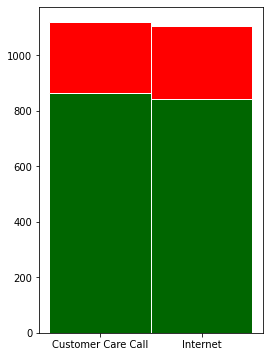

In [ ]:
total_way=2
r=np.arange(total_way)
fig = plt.gcf()
total_close=group_by_mode_communication.Close
total_resolved=group_by_mode_communication.Open
fig.set_size_inches(4, 6)
plt.bar(r, total_close, color="#006600", edgecolor='white', width=barWidth)
plt.bar(r, total_resolved, bottom=total_close, color='red', edgecolor='white', width=barWidth)
plt.xticks(r, ("Customer Care Call","Internet"))
plt.show()

Total  77.21179624664879  percentage of the case has been resloved yet which is received through the customer care calls


Total  76.289592760181  percentage of the case has been resloved yet which is received through the Internet
